Analysis
three obs trends

In [145]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from config import weatherkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output = "Output/weatherpy.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [146]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [147]:
# Set temperature units
temp_unit = "imperial"

# Define url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weatherkey}&units={temp_unit}&q="

# Set summary lists
city2 = []
cloudinesses = []
dates = []
humidities = []
lat = []
lng = []
max_temp = []
wind_speed = []
countries = []

# Set initial count
count_one = 0
set_one = 1

# Loop for creating summary
for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city2.append(city)
        else:
            count_one += 1
            city2.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping ...")
print("------------------------------\nData Retrieval Complete\n------------------------------")       

Processing Record 1 of Set 1 | mataura
City not found. Skipping ...
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | faya
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | ketchikan
Processing Record 8 of Set 1 | mys shmidta
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | tilichiki
City not found. Skipping ...
Processing Record 13 of Set 1 | surt
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | santa marta
Processing Record 16 of Set 1 | breves
Processing Record 17 of Set 1 | grants pass
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of S

Processing Record 39 of Set 4 | matadi
Processing Record 40 of Set 4 | tabas
Processing Record 41 of Set 4 | belmonte
Processing Record 42 of Set 4 | nikolskoye
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | nacala
Processing Record 46 of Set 4 | noumea
City not found. Skipping ...
City not found. Skipping ...
Processing Record 47 of Set 4 | jumla
Processing Record 48 of Set 4 | vanavara
Processing Record 49 of Set 4 | vinukonda
Processing Record 1 of Set 5 | kostomuksha
Processing Record 2 of Set 5 | halifax
Processing Record 3 of Set 5 | faanui
Processing Record 4 of Set 5 | plettenberg bay
Processing Record 5 of Set 5 | teya
Processing Record 6 of Set 5 | cherepovets
Processing Record 7 of Set 5 | seoul
Processing Record 8 of Set 5 | tavda
Processing Record 9 of Set 5 | samarai
Processing Record 10 of Set 5 | laguna
Processing Record 11 of Set 5 | camopi
City not found. Skipping ...
Processing Record 12 of Set 5 | bonfi

Processing Record 31 of Set 8 | mansa
Processing Record 32 of Set 8 | kachug
Processing Record 33 of Set 8 | porto santo
Processing Record 34 of Set 8 | hafizabad
Processing Record 35 of Set 8 | kyzyl-suu
Processing Record 36 of Set 8 | tucuman
City not found. Skipping ...
Processing Record 37 of Set 8 | morondava
Processing Record 38 of Set 8 | fuerte olimpo
Processing Record 39 of Set 8 | calvinia
Processing Record 40 of Set 8 | barcelos
Processing Record 41 of Set 8 | bethel
Processing Record 42 of Set 8 | matay
Processing Record 43 of Set 8 | sao joao da barra
Processing Record 44 of Set 8 | pacific grove
City not found. Skipping ...
Processing Record 45 of Set 8 | west plains
Processing Record 46 of Set 8 | ndele
Processing Record 47 of Set 8 | half moon bay
Processing Record 48 of Set 8 | weligama
Processing Record 49 of Set 8 | moose factory
Processing Record 1 of Set 9 | konakovo
Processing Record 2 of Set 9 | trincomalee
Processing Record 3 of Set 9 | wajima
Processing Record 

In [148]:
# Create dictionary for summary dataframe
weather_dict = {"City":city2, "Country":countries, "Latitude":lat, "Longitude":lng, "Date":dates, "Cloudiness":cloudinesses, "Humidity":humidities, "Max Temperature":max_temp, "Wind Speed":wind_speed}

# Create dataframe
weather_df = pd.DataFrame(weather_dict)

# Output to csv
weather_df.to_csv(output)

# Display dataframe
weather_df

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temperature,Wind Speed
0,mataura,NZ,-46.1927,168.8643,1619229959,99,89,48.99,1.01
1,bambous virieux,MU,-20.2567,57.4061,1619229988,40,89,78.80,11.50
2,yellowknife,CA,62.4560,-114.3525,1619229938,75,57,15.80,9.22
3,faya,SA,18.3851,42.4509,1619229986,0,51,62.60,1.90
4,ushuaia,AR,-54.8000,-68.3000,1619229937,75,93,42.80,14.97
...,...,...,...,...,...,...,...,...,...
544,ucluelet,CA,48.9329,-125.5528,1619230021,90,81,51.01,9.22
545,crotone,IT,39.0851,17.1178,1619230046,90,100,48.99,19.55
546,rosario,AR,-32.9468,-60.6393,1619230036,0,94,66.00,5.75
547,terenos,BR,-20.4422,-54.8603,1619230283,0,57,75.20,8.05


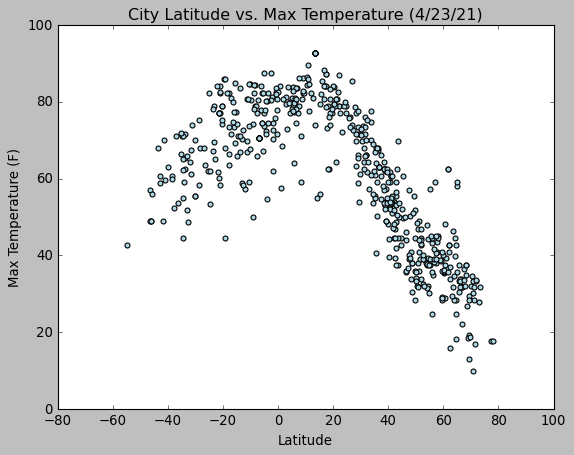

In [153]:
# Create Temperature v. Latitude Scatter
plt.scatter(weather_df["Latitude"],weather_df["Max Temperature"],edgecolors="black",facecolors="lightblue")

# Set titles and labels
plt.title("City Latitude vs. Max Temperature (4/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save image
plt.savefig("Images/latvtempscatter.png")

# Display scatter
plt.show()

After each plot, add a sentence or two explaining what the code is analyzing.

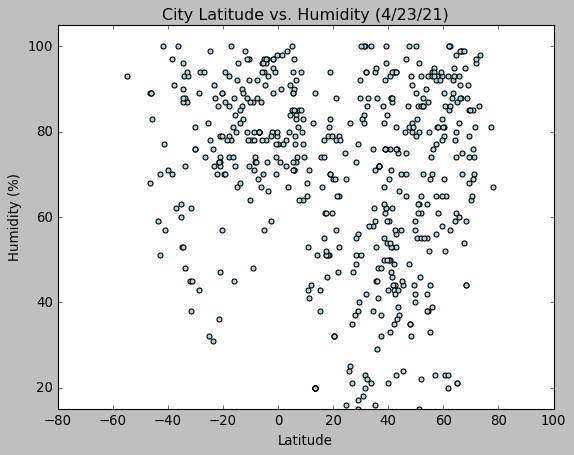

In [154]:
# Create Humidity v. Latitude chart
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolors="black",facecolors="lightblue")

# Set labels and title
plt.title("City Latitude vs. Humidity (4/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set y limit
plt.ylim(15,105)

# Save image
plt.savefig("Images/latvhumidityscatter.png")

# Display scatter
plt.show()

After each plot, add a sentence or two explaining what the code is analyzing.

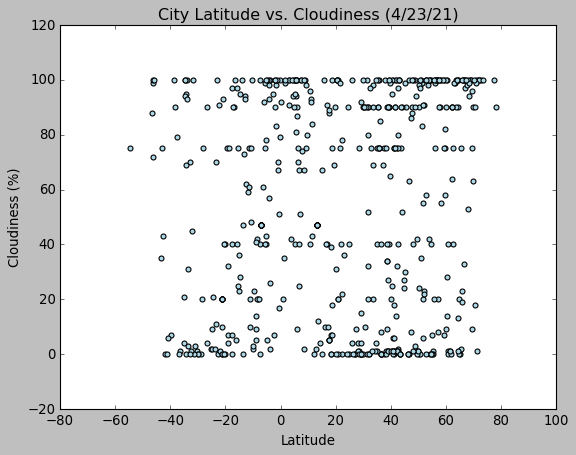

In [155]:
# Create Cloudiness v. Latitude chart
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],edgecolors="black",facecolors="lightblue")

# Set title and labels
plt.title("City Latitude vs. Cloudiness (4/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save image
plt.savefig("Images/latvcloudinessscatter.png")

# Display chart
plt.show()

After each plot, add a sentence or two explaining what the code is analyzing.

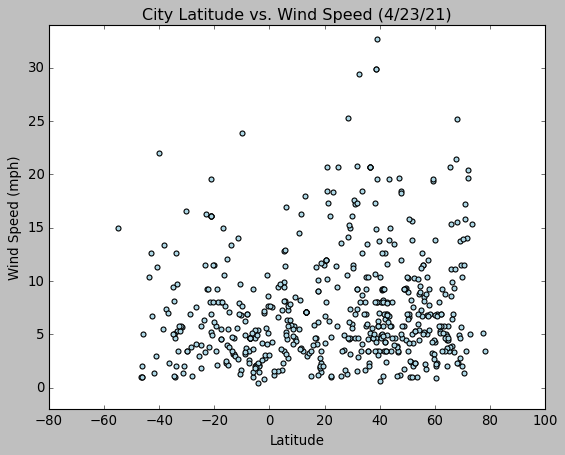

In [156]:
# Create Wind v. Latitude chart
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors="lightblue")

# Set labels and title
plt.title("City Latitude vs. Wind Speed (4/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set y limit
plt.ylim(-2,34)

# Save image
plt.savefig("Images/latvwindscatter.png")

# Display chart
plt.show()

After each plot, add a sentence or two explaining what the code is analyzing.

In [157]:
# Create Northern and Southern Hemisphere dataframes
x = 0
northhem = weather_df.query(f"Latitude >= {x}")
southhem = weather_df.query(f"Latitude < {x}")

The r-value is: -0.899597816342444


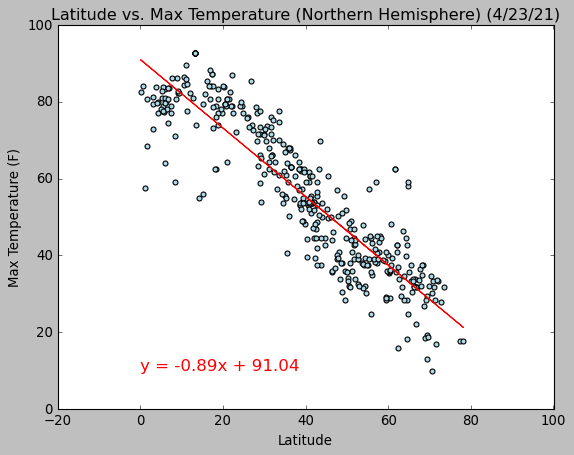

In [178]:
# Create scatter plot and regression
x_axis = northhem["Latitude"]
y_axis = northhem["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Max Temperature (Northern Hemisphere) (4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvtempnorth.png")

# Display graph
plt.show()

The r-value is: 0.592485229072663


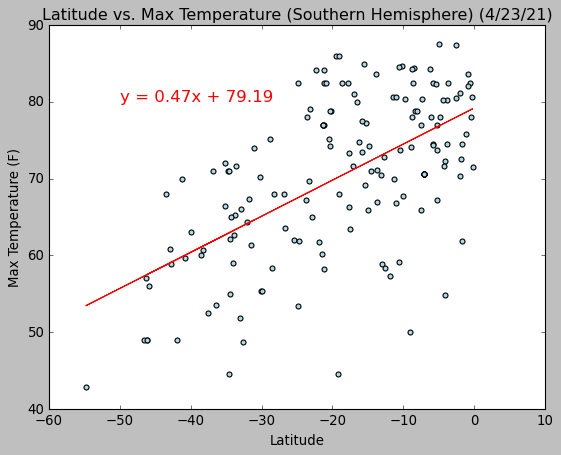

In [184]:
# Create scatter plot and regression
x_axis = southhem["Latitude"]
y_axis = southhem["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Max Temperature (Southern Hemisphere) (4/23/21)")

# Print correlation
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvtempsouth.png")

# Display graph
plt.show()

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

The r-value is: 0.1314805157305993


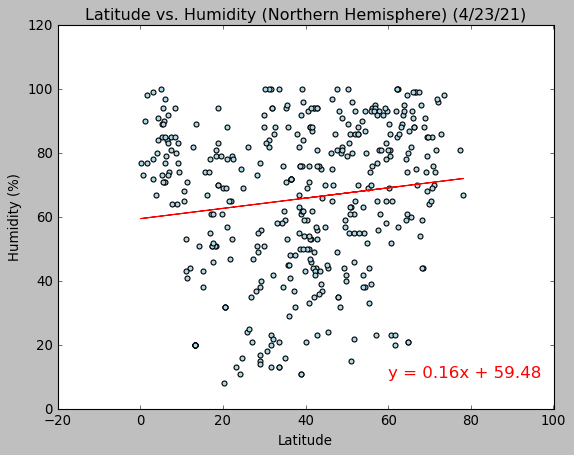

In [186]:
# Create scatter plot and regression
x_axis = northhem["Latitude"]
y_axis = northhem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(60,10),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity (Northern Hemisphere) (4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvhumiditynorth.png")

# Display graph
plt.show() 

The r-value is: 0.1823013059198142


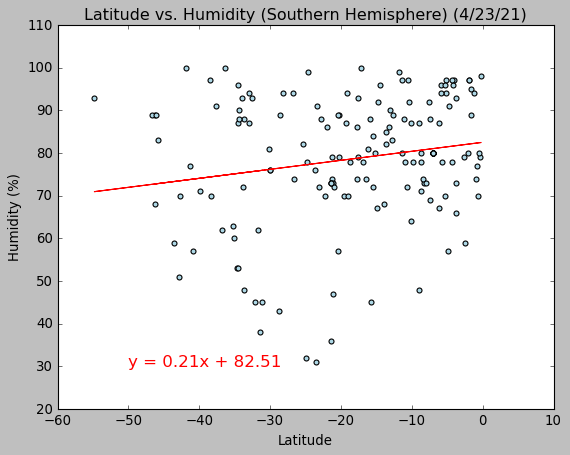

In [187]:
# Create scatter plot and regression
x_axis = southhem["Latitude"]
y_axis = southhem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity (Southern Hemisphere) (4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvhumiditysouth.png")

# Display graph
plt.show()

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

The r-value is: 0.073550721880657


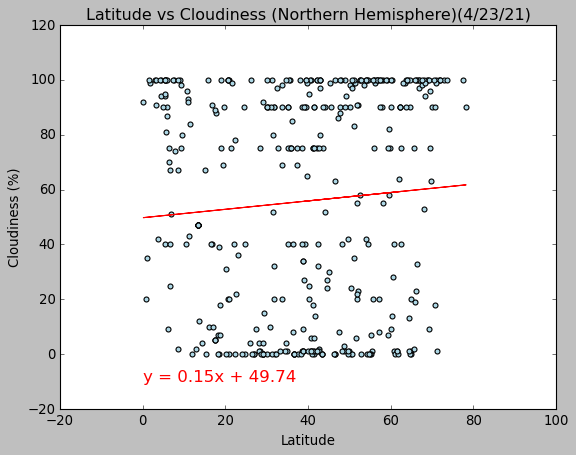

In [189]:
# Create scatter plot and regression
x_axis = northhem["Latitude"]
y_axis = northhem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs Cloudiness (Northern Hemisphere)(4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvcloudnorth.png")

# Display graph
plt.show()

The r-value is: 0.11928804854240346


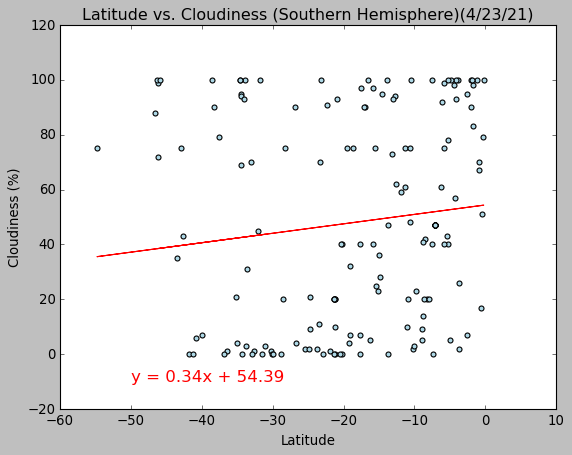

In [191]:
# Create scatter plot and regression
x_axis = southhem["Latitude"]
y_axis = southhem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Create labels and title
plt.annotate(line_eq,(-50,-10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness (Southern Hemisphere)(4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvcloudsouth.png")

# Display graph
plt.show()

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

The r-value is: 0.040346375394802333


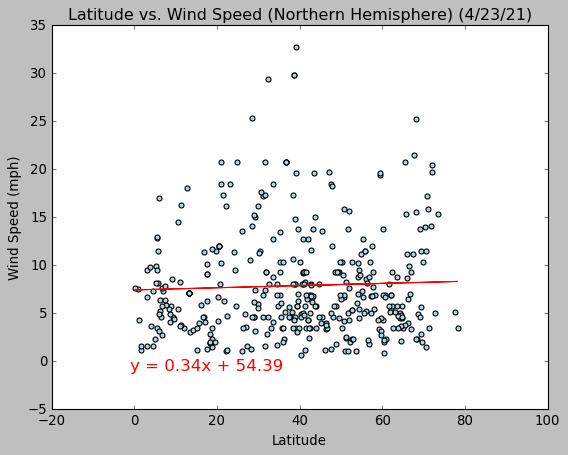

In [195]:
# Create scatter plot and regression
x_axis = northhem["Latitude"]
y_axis = northhem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(-1,-1),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Wind Speed (Northern Hemisphere) (4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvwindnorth.png")

# Display graph
plt.show()

The r-value is: -0.1657951271535101


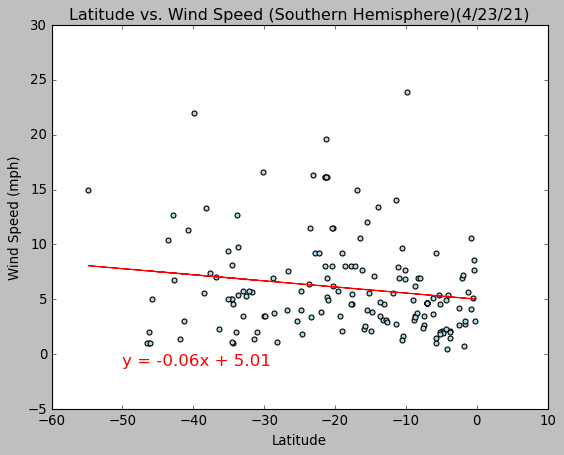

In [197]:
# Create scatter plot and regression
x_axis = southhem["Latitude"]
y_axis = southhem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="lightblue")
plt.plot(x_axis,regress,"r-")

# Set labels and title
plt.annotate(line_eq,(-50,-1),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Wind Speed (Southern Hemisphere)(4/23/21)")

# Print regression
print(f"The r-value is: {rvalue}")

# Save image
plt.savefig("Images/latvwindsouth.png")

# Display graph
plt.show()

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.